In [1]:
from gold_room_env import MiniHackGoldRoom
from utils import show_episode, ALLOWED_COMPOSITE_MOVES, ALLOWED_SIMPLE_MOVES
from planning import a_star_search, uniform_cost_search, greedy_search, apply
from online_search import online_greedy_search
import gym
import numpy as np

In [2]:
WIDTH = 4
HEIGHT = 4
N_GOLDS = 8
N_LEPS = 0
GOLD_SCORE = 100
STAIR_SCORE = 0
TIME_PENALTY = -1
MAX_STEPS = 100

SEARCH_ALGORITHMS = [a_star_search, uniform_cost_search, greedy_search]
ALG_NAMES = ['A*', 'Uniform Cost', 'Greedy']
ALLOWED_MOVES_FUNCTIONS = [ALLOWED_SIMPLE_MOVES, ALLOWED_COMPOSITE_MOVES]
MOVE_NAMES = ['simple moves', 'composite moves']

env = gym.make(
    'MiniHack-MyTask-Custom-v0',
    width=WIDTH,
    height=HEIGHT,
    n_leps=N_LEPS,
    n_golds=N_GOLDS,
    max_episode_steps=MAX_STEPS,
    gold_score=GOLD_SCORE,
    stair_score=STAIR_SCORE,
    time_penalty=TIME_PENALTY
    )

print(f'Starting position: {env.agent_coord}, Stair position: {env.stair_coord}')
print(f'Gold positions: {env.gold_coords}\n')

planning_stats = {}

for search_algorithm, alg_name in zip(SEARCH_ALGORITHMS, ALG_NAMES):
    temp = {}
    for moves_function, moves_name in zip(ALLOWED_MOVES_FUNCTIONS, MOVE_NAMES):
        plan, n_expanded = search_algorithm(env=env, allowed_moves_function=moves_function)
        temp[moves_name] = {
            'algorithm': search_algorithm,
            'moves': moves_name,
            'plan': plan,
            'n_expanded': n_expanded
        }
        print(f'Algorithm: {alg_name} ({moves_name})\nExpanded nodes: {n_expanded}')
        plan.show(env=env)
        print('\n')
    planning_stats[alg_name] = temp

Starting position: (2, 2), Stair position: (2, 3)
Gold positions: [(1, 1), (0, 1), (2, 0), (2, 2), (2, 1), (0, 2), (3, 2), (1, 0)]

Algorithm: A* (simple moves)
Expanded nodes: 648
Path: [(2, 2), (1, 2), (0, 2), (0, 1), (1, 1), (1, 0), (2, 0), (2, 1), (3, 2), (2, 3)]
Actions: ['W', 'W', 'S', 'E', 'S', 'E', 'N', 'NE', 'NW']
Total score: 690.172


Algorithm: A* (composite moves)
Expanded nodes: 1781
Path: [(2, 2), (3, 2), (2, 1), (2, 0), (1, 0), (1, 1), (0, 1), (0, 2), (1, 2), (2, 3)]
Actions: ['E', 'SW', 'S', 'W', 'N', 'W', 'N', 'E', 'NE']
Total score: 690.172


Algorithm: Uniform Cost (simple moves)
Expanded nodes: 24
Path: [(2, 2), (3, 2), (2, 1), (1, 1), (0, 1), (1, 0), (2, 0), (1, 1), (0, 2), (1, 2), (2, 3)]
Actions: ['E', 'SW', 'W', 'W', 'SE', 'E', 'NW', 'NW', 'E', 'NE']
Total score: 687.929


Algorithm: Uniform Cost (composite moves)
Expanded nodes: 52
Path: [(2, 2), (2, 1), (2, 0), (1, 0), (0, 1), (1, 1), (2, 2), (3, 2), (2, 2), (1, 2), (0, 2), (1, 2), (2, 3)]
Actions: ['S', 'S',

In [19]:
application_results = {}

for algorithm in ALG_NAMES:
    temp = {}
    for moves in MOVE_NAMES:
        env.myreset()
        states, rewards, done = apply(env, planning_stats[algorithm][moves]['plan'])
        temp[moves] = {
            'states': states,
            'rewards': rewards,
            'done': done
        }
        rws_round = []
        for r in rewards:
            rws_round.append(round(r, 3))
        sum_rws = sum(rewards)
        sum_rws_round = round(sum_rws, 3)
        print(f'{algorithm} ({moves})\nRewards: {rws_round}, sum: {sum_rws_round}\n')
    application_results[algorithm] = temp

A* (simple moves)
Rewards: [0, 98.586, 99.0, 99.0, 98.586, 99.0, 98.586, 98.586, -1.0, -1.0], sum: 689.343

A* (composite moves)
Rewards: [0, 99.0, 98.586, -1.414, 98.586, 99.0, 98.586, 99.0, 99.0, -1.0], sum: 689.343

Uniform Cost (simple moves)
Rewards: [0, 99.0, 99.0, 99.0, 98.586, 98.586, -1.0, -1.0], sum: 492.172

Uniform Cost (composite moves)
Rewards: [0, 99.0, 99.0, -1.0, 98.586, 99.0, -1.414, 99.0, 98.586, -1.414, -1.0, 98.586, -1.0, -1.414], sum: 684.515

Greedy (simple moves)
Rewards: [0, 99.0, -1.0, -1.414, 99.0, -1.0, -1.414, 98.586, -1.414, 98.586, -1.0], sum: 387.929

Greedy (composite moves)
Rewards: [0, 99.0, -1.0, -1.414, 99.0, -1.0, -1.414, 98.586, -1.414, 98.586, -1.0], sum: 387.929



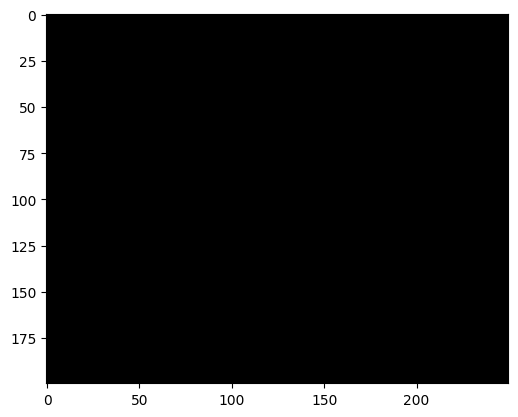

In [21]:
show_episode(application_results['A*']['simple moves']['states'], clear_output=True)

In [2]:
WIDTH = 4
HEIGHT = 4
N_GOLDS = 8
N_LEPS = 0
GOLD_SCORE = 100
STAIR_SCORE = 0
TIME_PENALTY = -1
MAX_STEPS = 100

env = gym.make(
    'MiniHack-MyTask-Custom-v0',
    width=WIDTH,
    height=HEIGHT,
    n_leps=N_LEPS,
    n_golds=N_GOLDS,
    max_episode_steps=MAX_STEPS,
    gold_score=GOLD_SCORE,
    stair_score=STAIR_SCORE,
    time_penalty=TIME_PENALTY
    )

print(f'Starting position: {env.agent_coord}, Stair position: {env.stair_coord}')
print(f'Gold positions: {env.gold_coords}\n')

env.myreset()
states, rewards, done, i = online_greedy_search(env=env, max_steps=MAX_STEPS)
rws_round = [round(r, 3) for r in rewards]
sum_rws_round = round(sum(rewards), 3)
print(f'Online Greedy Search\nRewards: {rws_round}, sum: {sum_rws_round}\n')

Starting position: (2, 1), Stair position: (1, 3)
Gold positions: [(1, 1), (2, 2), (3, 1), (1, 0), (2, 1), (0, 2), (1, 3), (3, 3)]

Online Greedy Search
Rewards: [0.0, 99.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0], sum: 1.0



KeyboardInterrupt: 

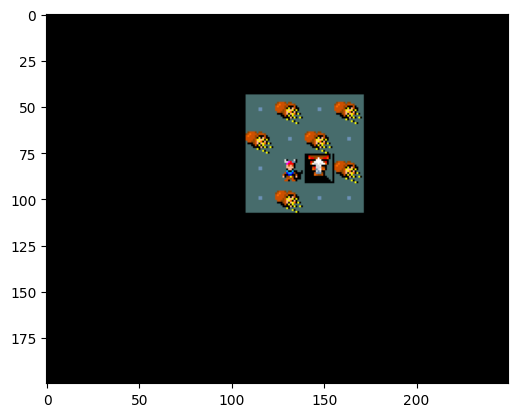

In [3]:
show_episode(states, clear_output=True)